# Assignment 5 

Custom Functions used in this script

In [1]:
import pandas as pnd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

##Custom functions used for this script
#Implementation of Bubble Sort Algorithm
def bubbleSort(arr):
    import copy as copy
    temp=copy.copy(arr)
    n = len(temp)
    ind = []
    for i in range(n):
        for j in range(0, n-i-1):
            if temp[j]>temp[j+1]:
                temp[j], temp[j+1] = temp[j+1], temp[j]
    for i in range(n):
        temparray=copy.copy(arr)
        ind.append(temparray.index(temp[i]))
    temp=np.array(temp)
    ind=np.array(ind)

    return temp, ind

Q1: Load the Dataset

In [2]:
rawirisdata=pnd.read_csv(r"C:\Users\keyen\Downloads\iris (1).data", sep=',', names=["SepLen","SepWid","PetLen","PetWid","Species"])

Q2: Normalize the Dataset

In [3]:
#implementation of min-Max Scaling 

def normalized_vector(vector):
    fmax=vector.max(axis=0)
    fmin=vector.min(axis=0)
    normalized_data= (vector - fmin)/(fmax - fmin)

    return normalized_data

In [4]:
# The following code normalizes the data and prepares the global variables for further calculations

In [5]:
irisarray=np.array(rawirisdata.drop('Species',axis=1))
labeloriginal=np.array(rawirisdata.Species)
#irisarray=normalized_vector(irisarray)
irisdata=pnd.DataFrame(irisarray,columns=['SepLen','SepWid','PetLen','PetWid'])
irisdata['Species']=labeloriginal

Q3: Distance Metric

In [6]:
## Euclidean Distance

def euclidiandistance(vector1,vector2):
    term=[]
    for i in range(len(vector1)-1):
        temp=0
        temp=(vector1[i]-vector2[i])**2
        term.append(np.sqrt(temp))
    distance = np.sum(term)

    return distance

Q4: Nearest Neighbors

In [7]:
def nearestneighbors(testdata,trainingdata,k):
    neighdistance=[]
    for j in range(0,len(trainingdata)):
        pointvector=trainingdata.iloc[j]
        if euclidiandistance(testdata,pointvector)==0.:
            continue
        else:
            neighdistance.append(euclidiandistance(testdata,pointvector))
    nearest,indnearest=bubbleSort(neighdistance)
    kneighbors=nearest[0:k]
    neighlabel=trainingdata['Species'].iloc[indnearest[0:k]]

    return kneighbors, neighlabel

Q5: Prediction Using 'K' Nearest Neighbors 

In [8]:
def classprediction(testdata,trainingdata,k):

    kneighbors=list();neighlabel=list();prediction=list()
    kn,nlabel= nearestneighbors(testdata,trainingdata,k)
    predictionvariable=stats.mode(nlabel)
    prediction=predictionvariable[0][0]

    return prediction

def labeldata(testpoint,trainingdata,k):
    neighborandlabel=list();prediction=list()
    for i in range(0,len(testpoint)):
        neighborandlabel.append(nearestneighbors(testpoint[i],trainingdata,k))
        prediction.append(classprediction(testpoint[i],trainingdata,k))
    neighbor=neighborandlabel[0]
    label=neighborandlabel[1]

    return neighbor,label,prediction

Q6: Test the given data

In [9]:
#labelling the given new data

k=5 # the number of neighbors to be considered
testdata1 = [5.1,2.5,3.2,4.3]
testdata2 = [4.9,3,1.4,0.2]
testdata3 = [6,3,4.8,1.8]
testpoints=[testdata1,testdata2,testdata3]
trainingdata=irisdata

neighbors,labels,predictions=labeldata(testpoints,trainingdata,k)
for i in range(0,3):
    print("The predicted class for testdata"+str(i+1)+" is ---->  " + str(predictions[i]))

The predicted class for testdata1 is ---->  Iris-versicolor
The predicted class for testdata2 is ---->  Iris-setosa
The predicted class for testdata3 is ---->  Iris-versicolor


Q7: Accuracy of Predictions

In [10]:
#Functions used in calculating accuracy of the algorithm on the training data

def testaccuracy(testdata,trainingdata,k,nsamples=149):

    tempdata=irisdata.sample(nsamples)
    tempindex=tempdata.index
    testdata=np.array(tempdata)


    irisneighbors,irisindex,labelprediction=labeldata(testdata,trainingdata,k)
    labelactual = irisdata['Species'].iloc[tempindex].tolist()

    accuracymeter=list()
    for i in range(len(testdata)):
        if labelactual[i]==labelprediction[i]:
            accuracymeter.append('Correct Prediction')
        else:
            accuracymeter.append('Incorrect Prediction')
            print('Sample at index '+str(trainingdata.index[i])+' is classified incorrectly' )
            print('Predicted class --> '+str(labelprediction[i]))
            print('But the actual class ----> '+labelactual[i])
            print('-------------------------------------------------------------')

    ncorrect = accuracymeter.count('Correct Prediction')
    nwrong = accuracymeter.count('Incorrect Prediction')
    percenterror=np.round((nwrong/(ncorrect+nwrong))*100,2)
    accuracystat=[ncorrect,nwrong,percenterror]


    return labelprediction,labelactual,accuracystat


#Computes the confusion matrix for the predictions

def makeconfusionmatrix(labelprediction,labelactual,classlabels):
    a11=0;a12=0;a13=0;
    a21=0;a22=0;a23=0;
    a31=0;a32=0;a33=0;

    for i in range(len(labelprediction)):

        if labelprediction[i]==classlabels[0] and labelactual[i] == classlabels[0]:
            a11+=1
        elif labelprediction[i]==classlabels[0] and labelactual[i] == classlabels[1]:
            a21+=1
        elif labelprediction[i]==classlabels[0] and labelactual[i] == classlabels[2]:
            a31+=1

        if labelprediction[i]==classlabels[1] and labelactual[i] == classlabels[0]:
            a12+=1
        elif labelprediction[i]==classlabels[1] and labelactual[i] == classlabels[1]:
            a22+=1
        elif labelprediction[i]==classlabels[1] and labelactual[i] == classlabels[2]:
            a32+=1

        if labelprediction[i]==classlabels[2] and labelactual[i] == classlabels[0]:
            a13+=1
        elif labelprediction[i]==classlabels[2] and labelactual[i] == classlabels[1]:
            a23+=1
        elif labelprediction[i]==classlabels[2] and labelactual[i] == classlabels[2]:
            a33+=1

    A=[[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]]


    return A

Sample at index 8 is classified incorrectly
Predicted class --> Iris-virginica
But the actual class ----> Iris-versicolor
-------------------------------------------------------------
Sample at index 38 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 54 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 79 is classified incorrectly
Predicted class --> Iris-virginica
But the actual class ----> Iris-versicolor
-------------------------------------------------------------
Sample at index 97 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 132 is classified incorrectly
Predicted class --> Iris-versi

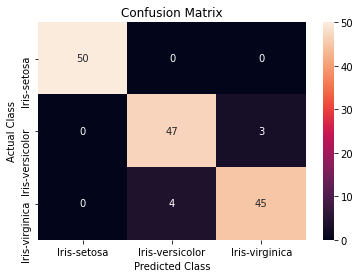

In [11]:
#Testing the accuracy of the prediction using IRIS Data
##Droping the labels on the dataset for prediction

nolabeldata=irisdata.drop('Species',axis=1)
trainingdata=irisdata
testdata=nolabeldata.sample(149)
classlabels=[irisdata['Species'][1],irisdata['Species'][71],irisdata['Species'][125],]

labelprediction,labelactual,nwrong= testaccuracy(testdata,irisdata,k)
confusionmatrix=makeconfusionmatrix(labelprediction,labelactual,classlabels)


#plotting confusion Matrix
fig=plt.figure()
ax=plt.gca()
sn.heatmap(confusionmatrix, annot=True,yticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'],xticklabels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix')
plt.show()


Q8 : Hyperparameter Tuning

In [12]:
# Functions used

def tuneKNN(testdata,trainingdata,classlabels,kvector,nsamples=149):

    ers=list()
    for i in kvector:
        templabelprediction=0;templabelactual=0;tempaccuracystat=0;

        templabelprediction,templabelactual,tempaccuracystat=testaccuracy(testdata,trainingdata,i)
        tempconfusionmatrix=makeconfusionmatrix(templabelprediction,templabelactual,classlabels)
        ers.append(tempaccuracystat[1])

        print('No. of nearest neighbors used for prediction ---> '+str(i))
        print('No. samples tested ---> '+str(nsamples))
        print('The accuracy of the prediction is ---> '+str(tempaccuracystat[2]) +'%')
        print('The number of correct predictions ---> '+str(tempaccuracystat[0]))
        print('The number of incorrect predictions ---> '+str(tempaccuracystat[1]))
        print('------------------------------------------------------------------')
        print('==================================================================')
        print('------------------------------------------------------------------')


    # No. of Neighbors with the least error margin
    errors=np.array(ers)
    tunednk=errors.argmin()+2
    
    return tunednk, errors

In [13]:
#Q8 Hyperparameter Tuning
#Test datasets
nolabeldata=irisdata.drop('Species',axis=1)
testdata=nolabeldata.sample(149)
trainingdata=irisdata
classlabels=[irisdata['Species'][1],irisdata['Species'][71],irisdata['Species'][125],]

#The vector representing no. of neighbors for successive iterations
kvector=range(2,12)
# the best choice of number of nearest neighbor is given below

idealk,errors=tuneKNN(testdata,trainingdata,classlabels,kvector)
print("The ideal K for K-nearest neighbors ---> "+str(idealk))

Sample at index 12 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 25 is classified incorrectly
Predicted class --> Iris-virginica
But the actual class ----> Iris-versicolor
-------------------------------------------------------------
Sample at index 33 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 37 is classified incorrectly
Predicted class --> Iris-versicolor
But the actual class ----> Iris-virginica
-------------------------------------------------------------
Sample at index 45 is classified incorrectly
Predicted class --> Iris-virginica
But the actual class ----> Iris-versicolor
-------------------------------------------------------------
Sample at index 57 is classified incorrectly
Predicted class --> Iris-versi

Text(0, 0.5, 'No. Of Errors')

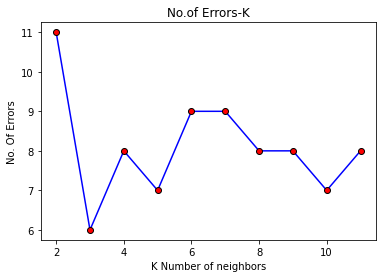

In [14]:
#Plot K versus eror rate
plt.plot(kvector,errors,'-o',c='b',markeredgecolor='k',markerfacecolor='r')
plt.title('No.of Errors-K')
plt.xlabel('K Number of neighbors')
plt.ylabel('No. Of Errors')


# K Means Algorithm With the help of Scikit Learn

In [15]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


##Custom functions used for this script
def floatconverter(data):
    dat=[];vectordat=[]
    for i in range(0,len(data)):
        dat.append(float(data[i]))

    return dat

Q1: Read the given Dataset

In [16]:
###Reading the data from the directory
rdata=pnd.read_csv(r"C:\Users\keyen\.spyder-py3\KNNMeans\dataset.csv", sep=',', names=["Feat1","Feat2"])
rdata=rdata.drop(rdata.index[0])

#Processing data into vectors and arrays for ease of processing

feature1=floatconverter(rdata.Feat1)
feature2=floatconverter(rdata.Feat2)
vectordat=np.transpose([feature1,feature2])
data = pnd.DataFrame(vectordat,columns=['Feat1','Feat2'])

Q2: Plot the Data using Matplotlib

Text(0.5, 1.0, 'The raw data')

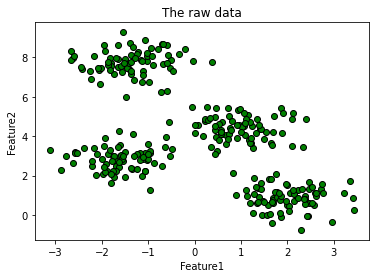

In [17]:
#Raw data on a 2D plane
fig1=plt.figure(2)
ax1=plt.gca()
ax1.plot(data.Feat1,data.Feat2,'o',c='g',markeredgecolor='k')
ax1.set_xlabel('Feature1')
ax1.set_ylabel('Feature2')
plt.title('The raw data')

Q3: Using Scikit learn to to classify the data into 4 clusters; 

From visual inspection, Ideal number K=4

Text(0.5, 1.0, 'K-Means-Clustering with 4 clusters')

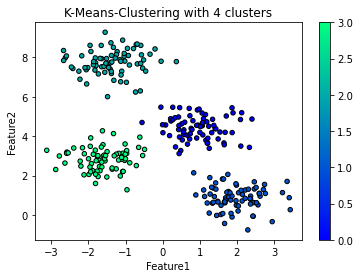

In [18]:
#K means clustering

Y=vectordat
kclustermeans=KMeans(n_clusters=4)
Model=kclustermeans.fit(Y)
labels = Model.labels_
fig2=plt.figure(1)
ax2=plt.gca()
data.plot.scatter(x='Feat1', y='Feat2',c=labels,colormap='winter',ax=ax2, edgecolor='k')

ax2.set_xlabel('Feature1')
ax2.set_ylabel('Feature2')
plt.title('K-Means-Clustering with 4 clusters')

Q3: Contd. --> Analysis to find out the best K for this dataset

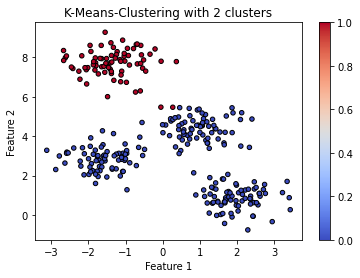

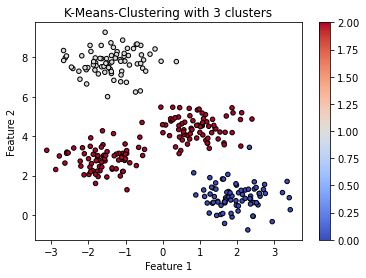

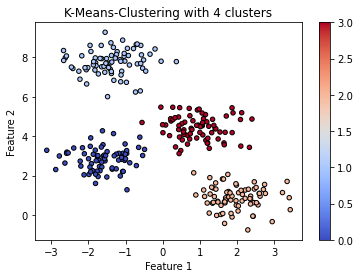

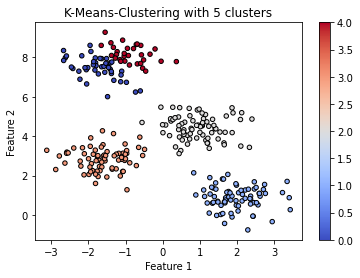

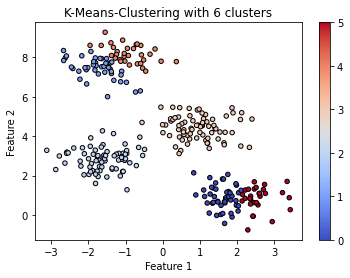

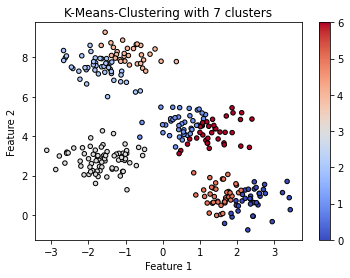

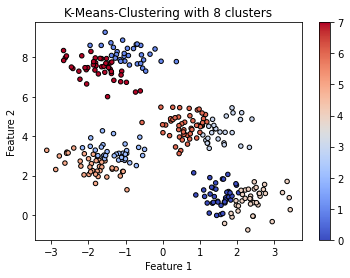

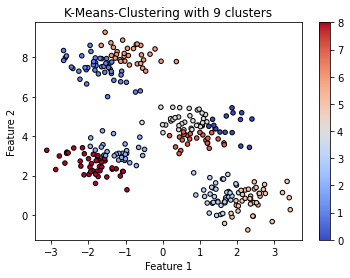

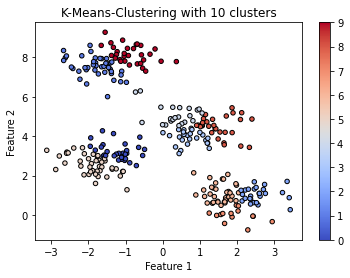

In [19]:
#Varying the number of clusters from 2 to 10

axn=[]
ncluster=range(2,11)
for i in ncluster:
    
    tempClusters=KMeans(n_clusters=i)
    tempModel=tempClusters.fit(vectordat)
    tempLabels=tempModel.labels_
    tempTitle='K-Means-Clustering with '+str(i)+' clusters'
    fign=plt.figure(i)
    tempax=plt.gca()
    axn.append(tempax)
    data.plot.scatter(x='Feat1',y='Feat2',c=tempLabels,colormap='coolwarm',ax=tempax,edgecolor='k',legend=True,title=tempTitle)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

Choosing the best K from the above plots and replotting the data with the best K. 

Best K=4

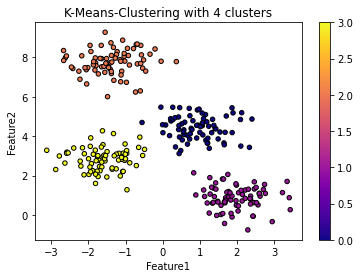

In [20]:
## plotting the clusters here with 4 clustering

fig3=plt.figure()
ax3=plt.gca()
data.plot.scatter(x='Feat1',y='Feat2',c=labels,colormap='plasma',ax=ax3,edgecolor='k')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-Means-Clustering with 4 clusters')
plt.show()

It is evident from the above plots that the best K for this data set is K=4